Loading Packages

In [1]:
library(tidyverse)
library(here)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /Users/damienfung/Desktop/git/Spiral-Data-Visualizer


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Taking a look at the data (BC)

In [2]:
data <- read.csv("http://www.bccdc.ca/Health-Info-Site/Documents/BCCDC_COVID19_Dashboard_Case_Details.csv")
head(data)
tail(data)

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
,<chr>,<chr>,<chr>,<chr>,<chr>
1,2020-01-29,Out of Canada,M,40-49,Lab-diagnosed
2,2020-02-06,Vancouver Coastal,F,50-59,Lab-diagnosed
3,2020-02-10,Out of Canada,F,20-29,Lab-diagnosed
4,2020-02-10,Out of Canada,M,30-39,Lab-diagnosed
5,2020-02-18,Interior,F,30-39,Lab-diagnosed
6,2020-02-24,Fraser,M,40-49,Lab-diagnosed


,Reported_Date,HA,Sex,Age_Group,Classification_Reported
,<chr>,<chr>,<chr>,<chr>,<chr>
293516,2022-01-13,Fraser,F,40-49,Lab-diagnosed
293517,2022-01-13,Fraser,M,20-29,Lab-diagnosed
293518,2022-01-13,Interior,F,50-59,Lab-diagnosed
293519,2022-01-13,Northern,M,20-29,Lab-diagnosed
293520,2022-01-13,Fraser,F,20-29,Lab-diagnosed
293521,2022-01-13,Vancouver Coastal,F,50-59,Lab-diagnosed


In [3]:
daily_data <- data %>%
    count(Reported_Date) %>%
    group_by(Reported_Date) %>%
    mutate(day_of_year = yday(Reported_Date),
        year = year(Reported_Date))
head(daily_data)
tail(daily_data)

Reported_Date,n,day_of_year,year
<chr>,<int>,<dbl>,<dbl>
2020-01-29,1,29,2020
2020-02-06,1,37,2020
2020-02-10,2,41,2020
2020-02-18,1,49,2020
2020-02-24,2,55,2020
2020-03-03,5,63,2020


Reported_Date,n,day_of_year,year
<chr>,<int>,<dbl>,<dbl>
2022-01-08,2420,8,2022
2022-01-09,2151,9,2022
2022-01-10,2000,10,2022
2022-01-11,2659,11,2022
2022-01-12,2537,12,2022
2022-01-13,2122,13,2022


Visualizing Basic Data

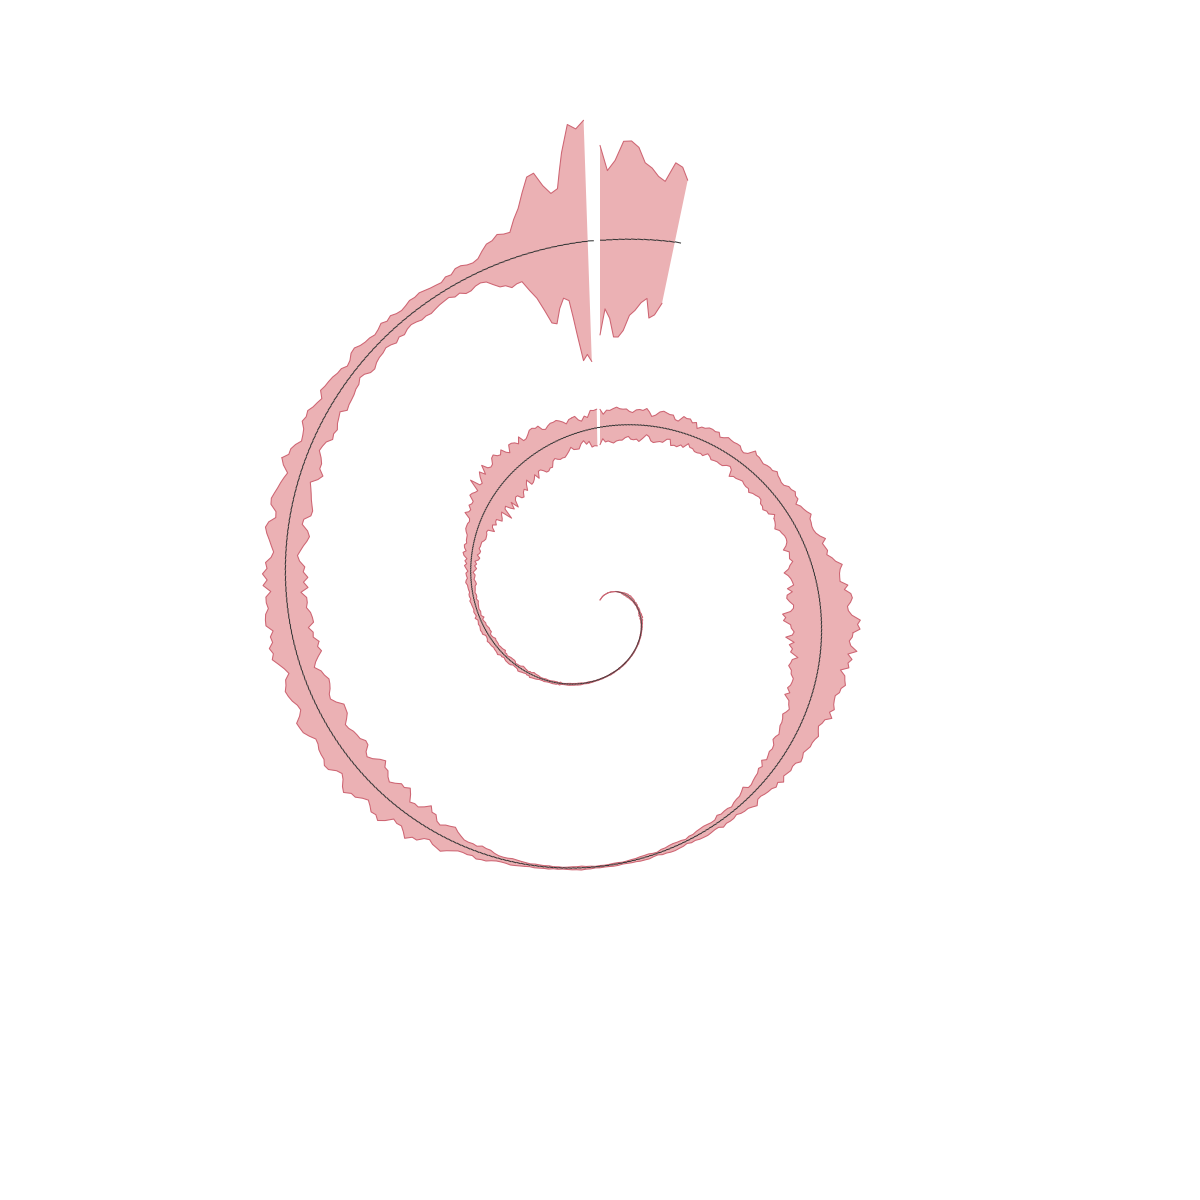

In [4]:
size_factor <- 10000
options(repr.plot.width = 10, repr.plot.height = 10)

# Colors
outline_color <- "#D97C86"
fill_color <- "#F0C0C1"
base_grey <- "grey28"

data_plot <- daily_data %>% 
  ggplot() +
  # area to encode the number of cases
  geom_ribbon(aes(x = day_of_year, 
                  ymin = as.POSIXct(Reported_Date) - n / 2 * size_factor,
                  ymax = as.POSIXct(Reported_Date) + n / 2 * size_factor,
                  group = year),
              size = 0.3, col = outline_color, fill = fill_color, show.legend = FALSE) +
  # basic line
  geom_segment(aes(x = day_of_year, xend = day_of_year + 1, 
                   y = as.POSIXct(Reported_Date), yend = as.POSIXct(Reported_Date)),
               col = base_grey, size = 0.3) +
  coord_polar() +
  theme_void()
data_plot

Adding Grid Lines

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2020→' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2020→' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2020→' in 'mbcsToSbcs': dot substituted for <92>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2021→' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2021→' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2021→' in 'mbcsToSbcs': dot substituted for <92>”
Warning message in grid.Call.graphics(C_text, 

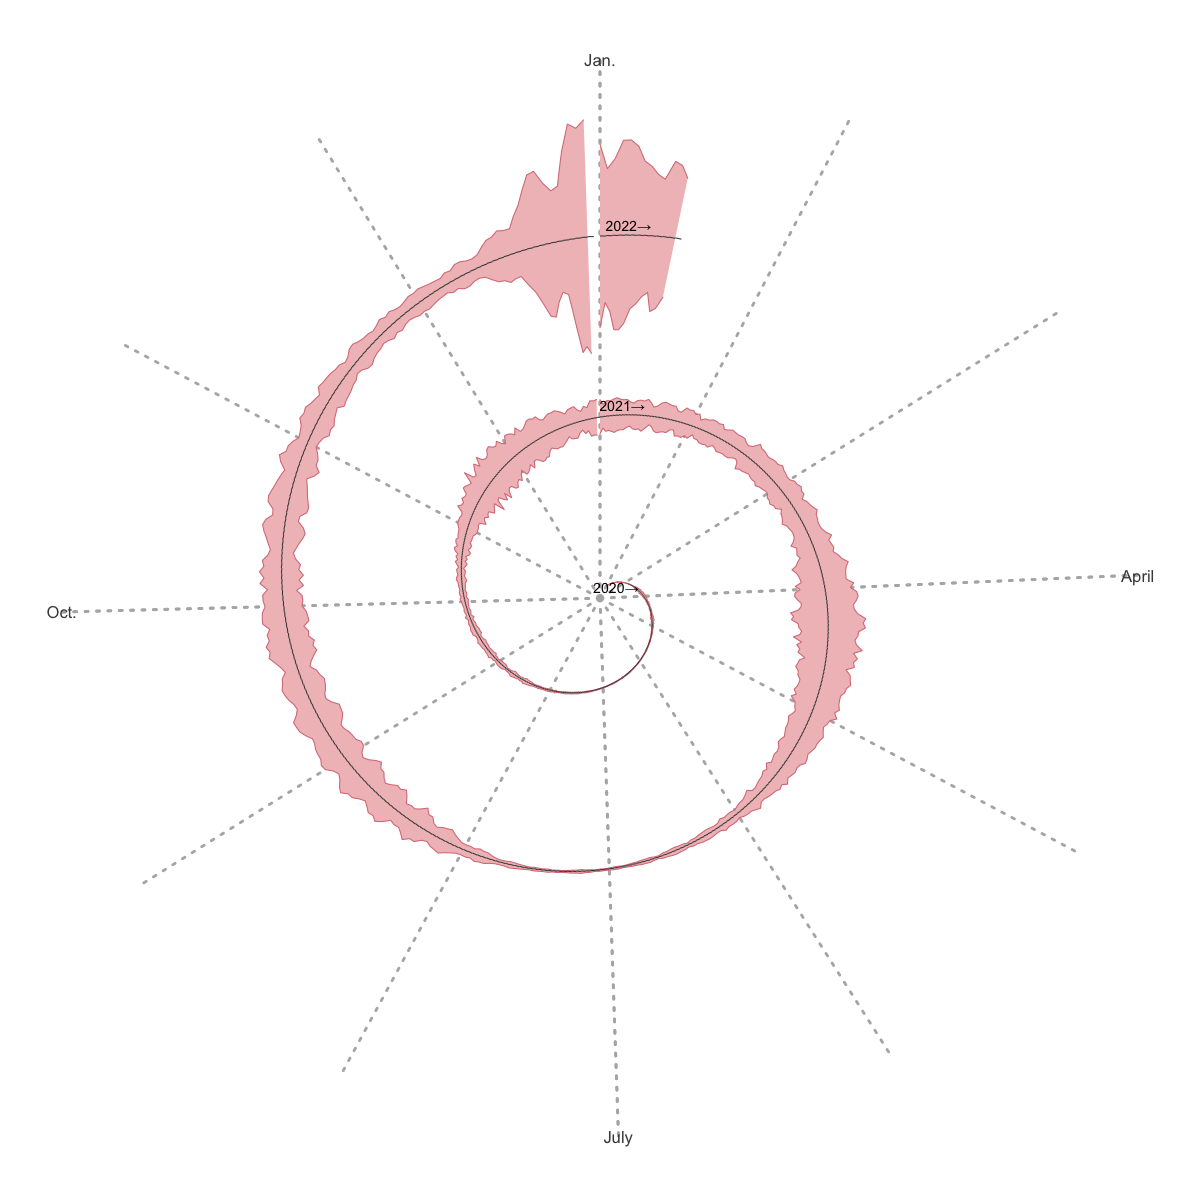

In [5]:
month_length <- c(31, 28, 31, 30, 31, 30,
                  31, 31, 30, 31, 30, 31) # the length of each month enumurated 

month_breaks <- cumsum(month_length) - 30

year_annotations <- list(
  year = 2020:2022,
  x = rep(3, 3),
  y = as.POSIXct(paste(2020:2022, "01", "01", sep = "-"))
)

data_plot + 
    scale_x_continuous(minor_breaks = month_breaks, 
                     breaks = month_breaks[c(1, 4, 7, 10)],
                     labels = c("Jan.", "April", "July", "Oct.")) +
    theme(
        plot.background = element_rect(color = NA, fill = "white"),
        panel.grid.major.x = element_line(color = "grey70", size = 0.8, linetype = "dotted"),
        panel.grid.minor.x = element_line(color = "grey70", size = 0.8, linetype = "dotted"),
        axis.text.x = element_text(color = base_grey, size = 10, hjust = 0.5),) +
    annotate("text", label = paste0(year_annotations$year, "\u2192"), x = year_annotations$x, 
        y = year_annotations$y,
        size = 3, vjust = -0.6, hjust = 0.15) 